In [1]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 845B-A8E3

 Directory of D:\Hackathons\Loan prediction

05-06-2020  09:18    <DIR>          .
05-06-2020  09:18    <DIR>          ..
05-06-2020  09:18    <DIR>          .ipynb_checkpoints
05-06-2020  09:18           107,770 Loan prediction.ipynb
05-06-2020  05:03             4,423 sample_submission_49d68Cx.csv
05-06-2020  09:16             2,613 submission.csv
05-06-2020  05:03            21,955 test_lAUu6dG.csv
05-06-2020  05:03            38,011 train_ctrUa4K.csv
               5 File(s)        174,772 bytes
               3 Dir(s)  154,788,970,496 bytes free


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("train_ctrUa4K.csv")

In [5]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
train_data.shape

(614, 13)

In [6]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


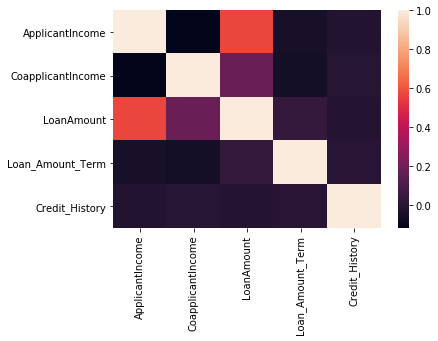

In [8]:
sns.heatmap(train_data.corr())

## Checking for null values

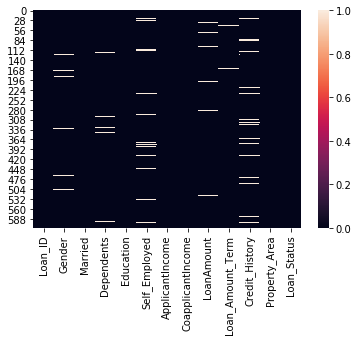

In [10]:
sns.heatmap(train_data.isnull())

In [49]:
t_data = train_data.dropna()
target = t_data['Loan_Status']
t_data = t_data.drop(columns="Loan_Status")

In [16]:
t_data.shape

(480, 13)

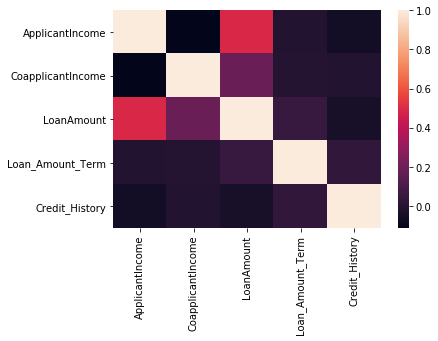

In [18]:
sns.heatmap(t_data.corr())

In [50]:
t_data.Education = t_data.Education.map({'Graduate':1, 'Not Graduate':0})
t_data.Gender = t_data.Gender.map({'Male':1, "Female":0})


In [51]:

t_data.drop(columns="Loan_ID",inplace=True)
t_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural
2,1,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,1,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban
4,1,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban
5,1,Yes,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban


In [58]:
t_data.drop(columns=["Married","Self_Employed","Property_Area","Dependents"],inplace=True)

In [53]:
t_data.Gender.unique()

array([1, 0], dtype=int64)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(t_data, target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [110]:
test_data = pd.read_csv("test_lAUu6dG.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [111]:
test_data = test_data.drop(columns=["Married","Self_Employed","Property_Area","Dependents","Loan_ID",])
test_data.Education = test_data.Education.map({'Graduate':1, 'Not Graduate':0})
test_data.Gender = test_data.Gender.map({'Male':1, "Female":0})
# test_data.dropna(inplace=True)
y_pred = clf.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [4]:
test_data2 = pd.read_csv("test_lAUu6dG.csv")
# y_pred.shape
test_data2.shape


NameError: name 'y_pred' is not defined

In [5]:
test_data2.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [101]:
# test_data2["Loan_ID"] = test_data2.Loan_ID
new_df = pd.DataFrame()
new_df["Loan_ID"] = test_data2["Loan_ID"]
new_df["Loan_Status"]= pd.Series(y_pred)


In [114]:
new_df.to_csv("submission.csv",index=False)

In [96]:
# t = test_data2.dropna()

In [112]:
new_df = new_df[:-73]

In [113]:
new_df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,N
7,LP001056,Y
9,LP001067,Y
10,LP001078,Y
14,LP001096,Y
